## Model Iterations

#### The purpose of this notebook is to create one large dataframe with all three files and analyze the data to see if there are any features that could be added to our first model. We will be looking at the correlation of our predictor variables to our target variable(sale price) as well as checking for multicollinearity since our predictor variables need to independent from each other.

### Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

### Create dataframe from the three datasets

In [5]:
import src.jw_total_df as jw
df = jw.create_dataframe()

In [52]:
df.shape

(43867, 151)

In [50]:
df.corr()['SalePrice'].sort_values(ascending=False)[:20]

SalePrice             1.000000
BldgGrade             0.203755
SqFtTotLiving         0.195816
SqFt2ndFloor          0.157990
BathFullCount         0.132185
NbrLivingUnits        0.121231
SqFt1stFloor          0.118724
Stories               0.117283
LakeWashington        0.115551
SqFtOpenPorch         0.107674
HBUAsIfVacant         0.102372
Bedrooms              0.100006
SqFtGarageAttached    0.092880
TidelandShoreland     0.085883
YrBuilt               0.079517
BathHalfCount         0.077212
Territorial           0.076930
Bath3qtrCount         0.071013
BldgGradeVar          0.063461
Township              0.063325
Name: SalePrice, dtype: float64

### Checking the dataframe to see if there are any na values

#### We chose sale price as our target variable, we need to check which variables have the highest correlation to sale price.

In [7]:
df.corr()['SalePrice'].sort_values(ascending=False)[:30]

SalePrice             1.000000
BldgGrade             0.203755
SqFtTotLiving         0.195816
SqFt2ndFloor          0.157990
BathFullCount         0.132185
NbrLivingUnits        0.121231
SqFt1stFloor          0.118724
Stories               0.117283
LakeWashington        0.115551
SqFtOpenPorch         0.107674
HBUAsIfVacant         0.102372
Bedrooms              0.100006
SqFtGarageAttached    0.092880
TidelandShoreland     0.085883
YrBuilt               0.079517
BathHalfCount         0.077212
Territorial           0.076930
Bath3qtrCount         0.071013
BldgGradeVar          0.063461
Township              0.063325
WfntLocation          0.056841
SqFtFinBasement       0.055821
AddnlCost             0.055512
SeattleSkyline        0.052085
LotDepthFactor        0.050498
FinBasementGrade      0.048553
InadequateParking     0.046362
SqFtTotBasement       0.041586
SewerSystem           0.040161
SqFtDeck              0.037218
Name: SalePrice, dtype: float64

In [7]:
df.corr()['SalePrice']['BldgGrade']

0.20375501763272327

#### Our dataframe holds 43,867 sales records

In [8]:
df.shape

(43867, 151)

#### Creating the corr_df dataframe which will hold the chosen possible predictor variables for our model

In [8]:
corr_df = pd.DataFrame([])
corr_df['SalePrice'] = df['SalePrice']
corr_df['BldgGrade'] = df['BldgGrade']
corr_df['SqFtTotLiving'] = df['SqFtTotLiving']
corr_df['SqFtOpenPorch'] = df['SqFtOpenPorch']
corr_df['SqFtEnclosedPorch'] = df['SqFtEnclosedPorch']
corr_df['BathFullCount'] = df['BathFullCount']
corr_df['BathHalfCount'] = df['BathHalfCount']
corr_df['NbrLivingUnits'] = df['NbrLivingUnits']
corr_df['Bedrooms'] = df['Bedrooms']
corr_df['SqFtGarageAttached'] = df['SqFtGarageAttached']
corr_df['TidelandShoreland'] = df['TidelandShoreland']
corr_df['Township'] = df['Township']

#### By looking at the mean values of columns we can see that Building Grade, Open Porch sqft, Enclosed Porch sqft, Full Bathroom Count, Half Bathroom Count, Number of Living Units, Bedrooms, and Tideland/Shoreland hold categorical data. We may need to One Hot Encode these later for the model.

In [18]:
print(corr_df.mean())

SalePrice             594354.310849
BldgGrade                  7.662571
SqFtTotLiving           2157.995806
SqFtOpenPorch             76.464632
SqFtEnclosedPorch          5.914993
BathFullCount              1.575831
BathHalfCount              0.466113
NbrLivingUnits             1.024893
Bedrooms                   3.427383
SqFtGarageAttached       256.435407
TidelandShoreland          0.022477
dtype: float64


In [20]:
sum(corr_df['SalePrice']==0)

13904

#### We can see that there are is 13904 records(rows) in the dataframe with 0 as the values for the sale price column. These could pose a problem when creating the model by skewing the distribution. Let's drop these rows for now.

In [12]:
sum(corr_df['SqFtTotLiving']==0)

0

In [9]:
corr_df = corr_df[corr_df['SalePrice'] > 0]

#### Our correlation dataframe now has 29,961 records

In [34]:
corr_df.shape

(29961, 11)

#### The cell below was an attempt at scaling a few predictor variables to have them on the same scale but this method did not work out the way I was hoping. I eneded up with an R-squared of .089 with the feature's p-values being significantly high.

In [35]:
#data = corr_df

#log_sqftLiving = np.log(data['SqFtTotLiving'])
#sqftOpenP = (data['SqFtOpenPorch'])
#sqftEnclosedP = (data['SqFtEnclosedPorch'])
#sqftGarage = (data['SqFtGarageAttached'])

#scaled_sqftLiving = (log_sqftLiving-min(log_sqftLiving))/(max(log_sqftLiving)-min(log_sqftLiving))
#scaled_sqftOpenP = (sqftOpenP-min(sqftOpenP))/(max(sqftOpenP)-min(sqftOpenP))
#scaled_sqftEnclosedP = (sqftEnclosedP-min(sqftEnclosedP))/(max(sqftEnclosedP)-min(sqftEnclosedP))
#scaled_sqftGarage = (sqftGarage-min(sqftGarage))/(max(sqftGarage)-min(sqftGarage))

#model_df = pd.DataFrame([])
#model_df['saleprice'] = data['SalePrice']
#model_df['sfliving'] = scaled_sqftLiving
#model_df['sfopenp'] = scaled_sqftOpenP
#model_df['sfclosep'] = scaled_sqftEnclosedP
#model_df['sfgarage'] = scaled_sqftGarage
#bldg_dummies = pd.get_dummies(data['BldgGrade'], prefix='bldgG', drop_first=True)
#bed_dummies = pd.get_dummies(data['Bedrooms'], prefix='bedr', drop_first=True)
#tide_dummies = pd.get_dummies(data['TidelandShoreland'], prefix='tde/shore', drop_first=True)
#price = corr_df['SalePrice']
#model_df = pd.concat([price, model_df, bldg_dummies, bed_dummies, tide_dummies], axis=1)

In [37]:
#model_ols = pd.concat([price, scaled_sqftLiving, bldg_dummies], axis=1)
#model_ols

In [38]:
#outcome = 'SalePrice'
#predictors = model_ols.drop('SalePrice', axis=1)
#pred_sum = '+'.join(predictors.columns)
#formula = outcome + '~' + pred_sum

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     224.0
Date:                Tue, 16 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:53:55   Log-Likelihood:            -4.6357e+05
No. Observations:               29961   AIC:                         9.272e+05
Df Residuals:                   29947   BIC:                         9.273e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.697e+05   1.27e+06      0.604      0.546   -1.73e+06    3.27e+06
scaled_sqftLiving  1.845e+06   1.98e+05      9.308      0.000    1.46e+06    2.23e+06
bldgG_2            -1.83e+06   1.37e+06     -1.335      0.182   -4.52e+06    8.56e+05
bldgG_3            -1.82e+06   1.29e+06     -1.412      0.158   -4.35e+06    7.07e+05
bldgG_4           -1.625e+06   1.28e+06     -1.273      0.203   -4.13e+06    8.78e+05
bldgG_5           -1.506e+06   1.27e+06     -1.185      0.236      -4e+06    9.85e+05
bldgG_6           -1.673e+06   1.27e+06     -1.317      0.188   -4.16e+06    8.16e+05
bldgG_7           -1.503e+06   1.27e+06     -1.184      0.236   -3.99e+06    9.85e+05
bldgG_8           -1.469e+06   1.27e+06     -1.157      0.247   -3.96e+06    1.02e+06
bldgG_9            -1.23e+06   1.27e+06     -0.969      0.333   -3.72e+06    1.26e+06
bldgG_10          -7.641e+05   1.27e+06     -0.601      0.548   -3.25e+06    1.73e+06
bldgG_11          -7.221e+04   1.27e+06     -0.057      0.955   -2.56e+06    2.42e+06
bldgG_12            7.76e+05   1.28e+06      0.608      0.543   -1.72e+06    3.28e+06
bldgG_13            4.31e+06   1.29e+06      3.333      0.001    1.78e+06    6.84e+06
==============================================================================
Omnibus:                    58758.260   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        170675626.503
Skew:                          15.700   Prob(JB):                         0.00
Kurtosis:                     371.419   Cond. No.                         868.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
train, test = train_test_split(df)
print(len(train), len(test))

22470 7491


In [138]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     301.4
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:16:35   Log-Likelihood:            -3.4768e+05
No. Observations:               22470   AIC:                         6.954e+05
Df Residuals:                   22459   BIC:                         6.955e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -2.19e+06   9.12e+04    -24.019      0.000   -2.37e+06   -2.01e+06
BldgGrade           2.032e+05   1.11e+04     18.362      0.000    1.81e+05    2.25e+05
SqFtTotLiving        183.7121     16.361     11.228      0.000     151.643     215.781
SqFtOpenPorch        163.2661     61.470      2.656      0.008      42.782     283.751
SqFtEnclosedPorch   1198.2055    247.911      4.833      0.000     712.283    1684.128
BathFullCount      -1.608e+04    1.5e+04     -1.072      0.284   -4.55e+04    1.33e+04
BathHalfCount       -5.18e+04   1.75e+04     -2.965      0.003   -8.61e+04   -1.76e+04
NbrLivingUnits      1.419e+06   4.95e+04     28.650      0.000    1.32e+06    1.52e+06
Bedrooms           -9.743e+04   1.17e+04     -8.357      0.000    -1.2e+05   -7.46e+04
SqFtGarageAttached     2.7200     34.171      0.080      0.937     -64.258      69.698
TidelandShoreland   8.878e+05   4.81e+04     18.466      0.000    7.94e+05    9.82e+05
==============================================================================
Omnibus:                    44060.342   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        151286488.355
Skew:                          15.584   Prob(JB):                         0.00
Kurtosis:                     403.770   Cond. No.                     2.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
summary = model.summary()
ptable = summary.tables[1]
ptable = pd.DataFrame(ptable.data)
ptable.columns = ptable.iloc[0]
ptable = ptable.drop(0)
ptable = ptable.set_index(p_table.columns[0])
ptable['P>|t|'] = ptable['P>|t|'].astype(float)
xcols = list(ptable[ptable['P>|t|'] < 0.05].index)
xcols.remove('Intercept')
print(len(ptable), len(x_cols))
print(x_cols[:1])
ptable.head()

In [141]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     376.6
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:18:07   Log-Likelihood:            -3.4768e+05
No. Observations:               22470   AIC:                         6.954e+05
Df Residuals:                   22461   BIC:                         6.954e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.185e+06   9.08e+04    -24.079      0.000   -2.36e+06   -2.01e+06
BldgGrade           2.02e+05   1.09e+04     18.580      0.000    1.81e+05    2.23e+05
SqFtTotLiving       179.3857     15.705     11.422      0.000     148.603     210.168
SqFtOpenPorch       161.9510     61.391      2.638      0.008      41.621     282.281
SqFtEnclosedPorch  1207.3318    247.313      4.882      0.000     722.581    1692.082
BathHalfCount     -5.175e+04   1.74e+04     -2.977      0.003   -8.58e+04   -1.77e+04
NbrLivingUnits     1.414e+06   4.91e+04     28.780      0.000    1.32e+06    1.51e+06
Bedrooms          -9.937e+04   1.15e+04     -8.637      0.000   -1.22e+05   -7.68e+04
TidelandShoreland  8.895e+05    4.8e+04     18.519      0.000    7.95e+05    9.84e+05
==============================================================================
Omnibus:                    44056.764   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        151179808.483
Skew:                          15.581   Prob(JB):                         0.00
Kurtosis:                     403.628   Cond. No.                     2.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:1])
p_table.head()

9 8
['BldgGrade']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-2.185e+06,9.08e+04,-24.079,0.000,-2.36e+06,-2.01e+06
BldgGrade,2.02e+05,1.09e+04,18.580,0.000,1.81e+05,2.23e+05
SqFtTotLiving,179.3857,15.705,11.422,0.000,148.603,210.168
SqFtOpenPorch,161.9510,61.391,2.638,0.008,41.621,282.281
SqFtEnclosedPorch,1207.3318,247.313,4.882,0.000,722.581,1692.082


In [18]:
corr_df

,SalePrice,BldgGrade,SqFtTotLiving,SqFtOpenPorch,SqFtEnclosedPorch,BathFullCount,BathHalfCount,NbrLivingUnits,Bedrooms,SqFtGarageAttached,TidelandShoreland
0,560000,7,1930,180,0,2,0,1,3,550,0
1,435000,7,1975,45,0,1,0,1,3,465,0
2,550000,8,1560,0,0,1,1,1,2,240,0
3,409950,7,1850,0,0,2,1,1,3,0,0
4,380000,7,1750,670,0,1,1,1,4,510,0
...,...,...,...,...,...,...,...,...,...,...,...
43862,930000,8,2600,0,0,2,0,1,3,0,0
43863,850000,8,2220,40,0,2,1,1,3,440,0
43864,686000,7,1910,80,0,1,0,2,4,0,0
43865,695000,8,2520,350,0,2,1,1,4,520,0


### The scaling above did not work out as planned. Going back to the original correlation dataframe for some more analysis.

#### Checking to see if there are outliers in the Sale Price column of the dataframe

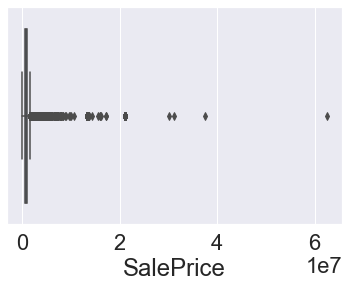

In [51]:
sns.boxplot(corr_df['SalePrice'])

#### The sale price column shows 5 outliers above twenty million, lets remove these rows.

In [10]:
corr_df = corr_df[corr_df['SalePrice'] < 20000000]

In [40]:
corr_df.shape

(29895, 11)

In [54]:
sns.set(style='whitegrid', font_scale=1.5)

#### Let's see how the building grade grade code correlates to sale price

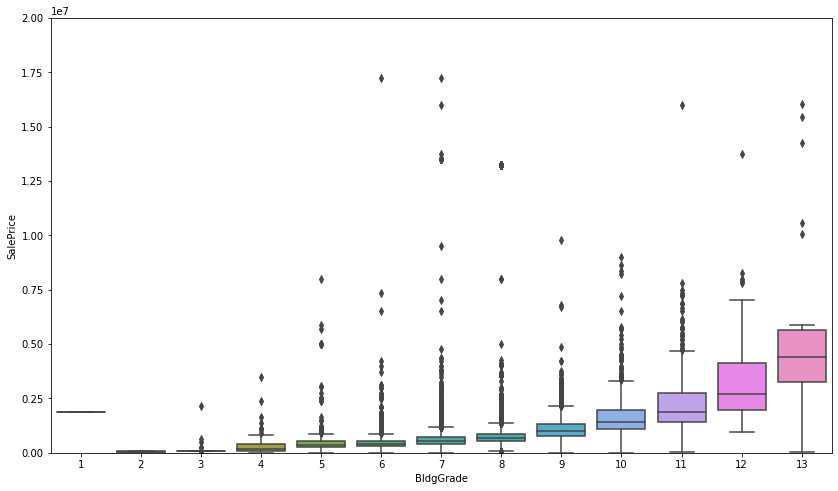

In [47]:
var = 'BldgGrade'
data = pd.concat([corr_df['SalePrice'], corr_df[var]], axis=1)
fig, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=20000000)
plt.show()

### Checking to see how Square Feet of a Enclosed Porch correlates to Sale Price.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


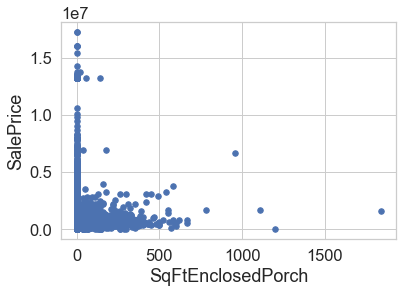

In [56]:
var = 'SqFtEnclosedPorch'
data = pd.concat([corr_df['SalePrice'], corr_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', s=30);

### Checking to see how Square Feet of an Open Porch correlates to Sale Price.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


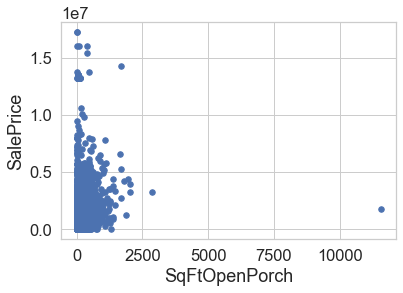

In [57]:
var = 'SqFtOpenPorch'
data = pd.concat([corr_df['SalePrice'], corr_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', s=30);

### Checking to see how Square Feet of an attached garage correlates to Sale Price.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


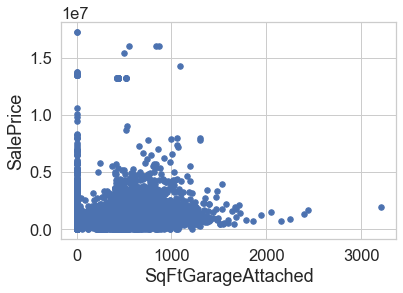

In [58]:
var = 'SqFtGarageAttached'
data = pd.concat([corr_df['SalePrice'], corr_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', s=30);

### Creating a new column 'log_saleprice' for the dataframe which will hold the log transformations of sale prices. I am doing this as an attempt to get my target variable to be normally distributed.

In [29]:
corr_df['log_saleprice'] = np.log(corr_df['SalePrice'])

In [15]:
sns.set(style='whitegrid', font_scale=2)


#### Double checking the correlation of the original dataframe to see if there are any features I may have missed

In [16]:
from matplotlib import cm

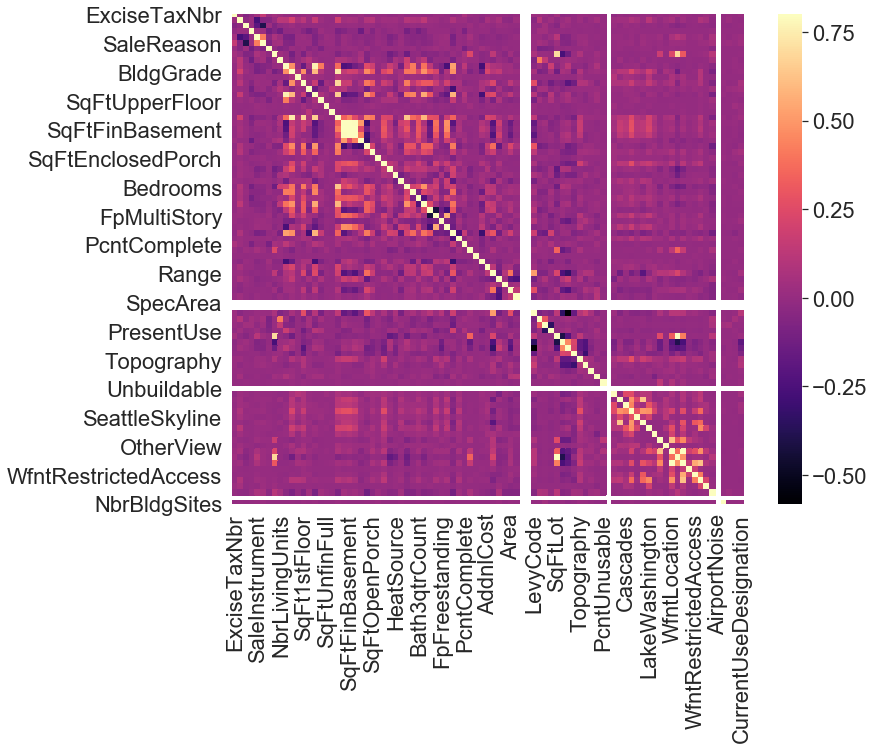

In [17]:
heatmap = df.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(heatmap, vmax=.8, cmap='magma', square=True)

### Creating a heatmap of the top 20 features that have the highest correlation to Sale Price.

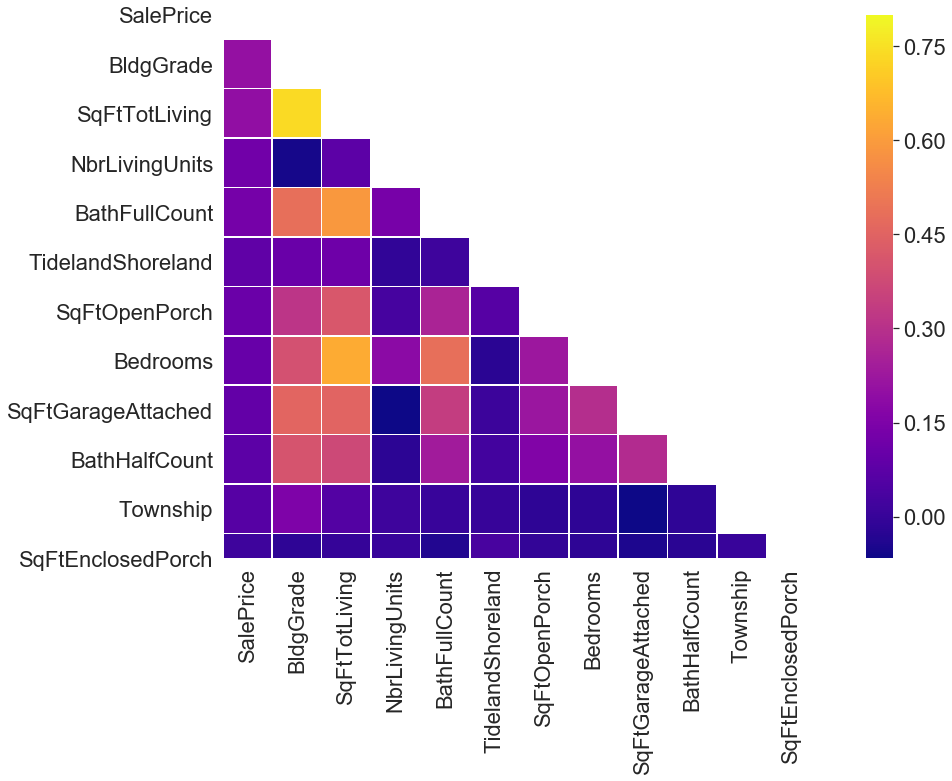

In [27]:
n = 13
cols = heatmap.nlargest(n, 'SalePrice')['SalePrice'].index
mask = np.triu(np.ones_like(df[cols].corr()))
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df[cols].corr(), vmax=.8, cmap='plasma', robust=True, linewidth=.5,linecolor='white', mask=mask, square=True)
plt.savefig('../../report/figures/jw_top20_entire_df_heatmap.png', orientation='landscape')

In [54]:
df.corr()['SalePrice']['Township']

0.06332479023977179

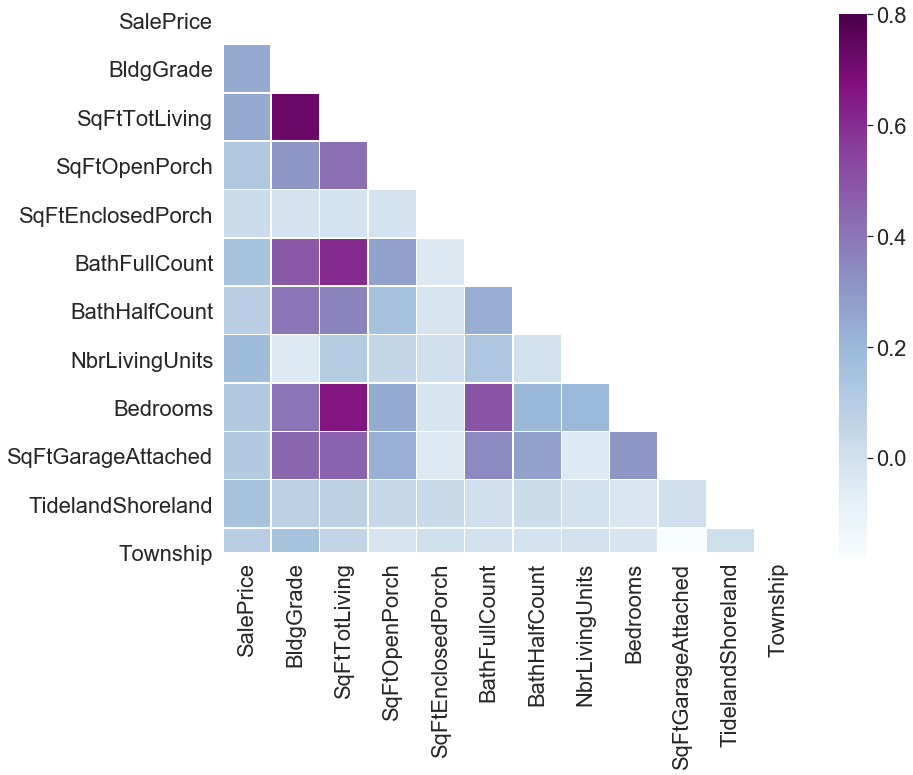

In [31]:
heatmap = corr_df.corr()
mask = np.triu(np.ones_like(corr_df.corr()))
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(heatmap, vmax=.8, cmap='BuPu', xticklabels=corr_df.columns, yticklabels=corr_df.columns, linewidth=.5, mask=mask, square=True)
plt.savefig('../../report/figures/jw_feature_df_heatmap.png', orientation='landscape', pad_inches=1)

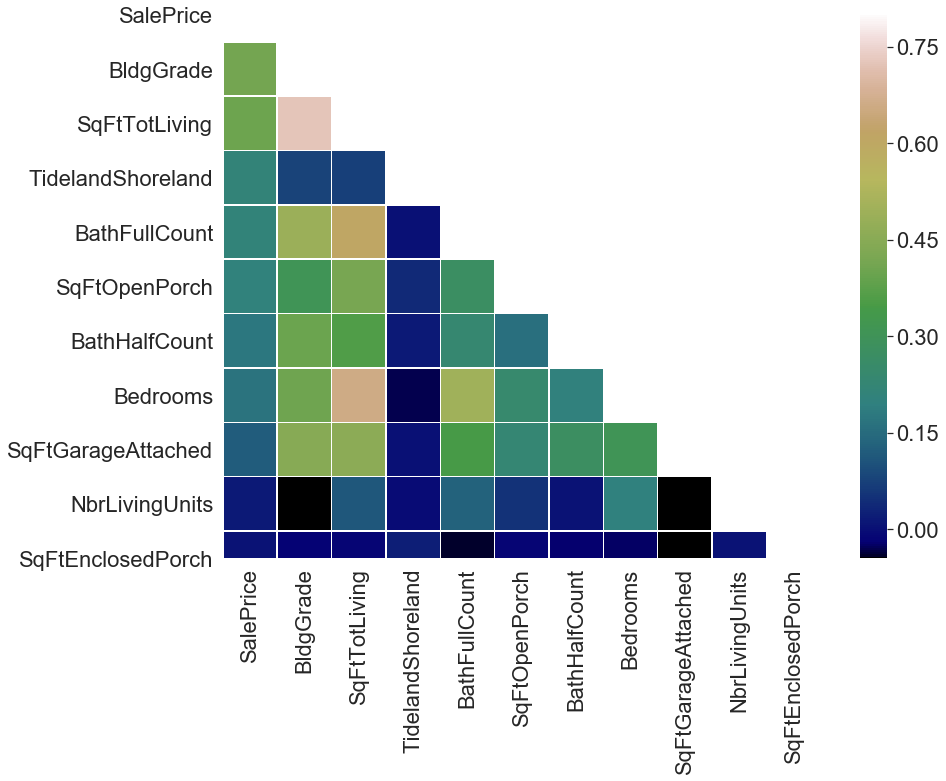

In [132]:
n = 20
cols = heatmap.nlargest(n, 'SalePrice')['SalePrice'].index
mask = np.triu(np.ones_like(corr_df[cols].corr()))
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corr_df[cols].corr(), vmax=.8, cmap='gist_earth', robust=True, linewidth=.5, mask=mask, square=True)
plt.savefig('../../report/figures/jw_top20_correlated_df_heatmap.png', orientation='landscape', pad_inches=1)

### Creating a table to see which columns have any missing values

In [184]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
SpecSubArea,43867,1.000000
SpecArea,43867,1.000000
ZipCode,6642,0.151412
PlatName,5158,0.117583
PropName,2440,0.055623
DirectionSuffix,176,0.004012
DirectionPrefix,176,0.004012
SqFtTotLiving,0,0.000000
SqFtUnfinHalf,0,0.000000
SqFtTotBasement,0,0.000000


### I am going to choose building grade, sq ft of total living, and the full bathroom count as my predictors. Here is a pairplot showing their linearity.

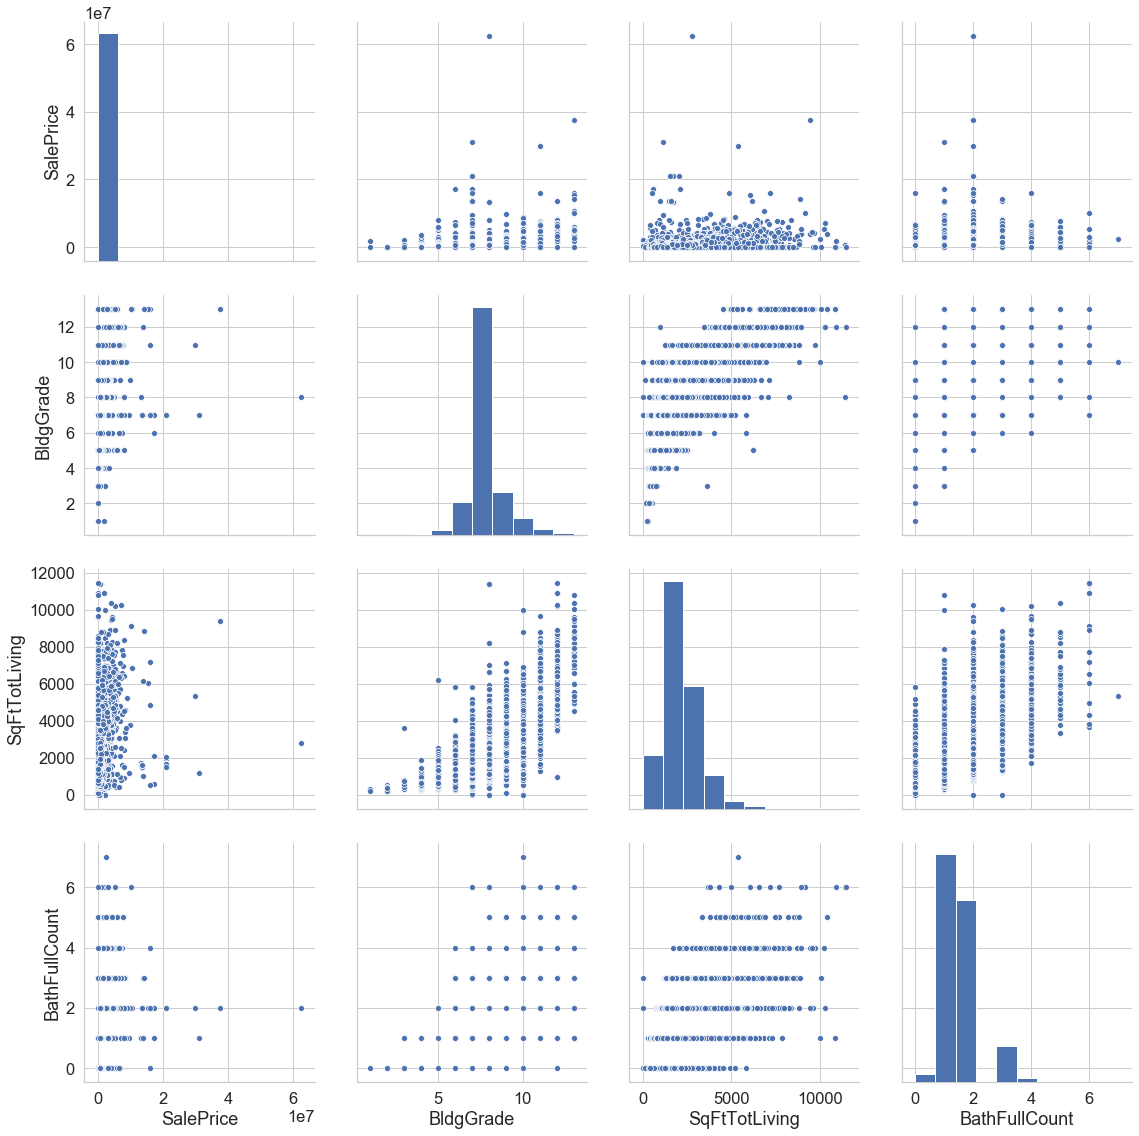

In [93]:
cols = ['SalePrice', 'BldgGrade', 'SqFtTotLiving', 'BathFullCount']
sns.pairplot(df[cols], height=4);

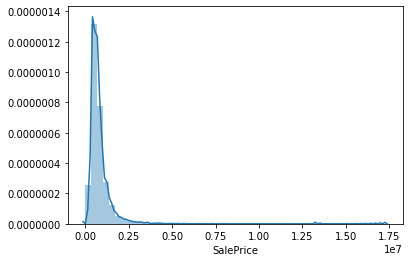

In [41]:
sns.distplot(corr_df['SalePrice'])

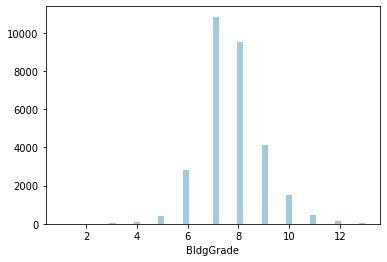

In [43]:
sns.distplot(corr_df['BldgGrade'], kde=False)

### Creating a second model with building grade as a function of saleprice.

#### Next, I will try to include the power transformed full bathroom count as an additional feature to the model.

In [185]:
ssm_df = corr_df[['SalePrice', 'BldgGrade']]
formula = 'SalePrice ~ BldgGrade'

In [186]:
ssm = smf.ols(formula=formula, data=ssm_df).fit()

In [187]:
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     6129.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:51:58   Log-Likelihood:            -4.4705e+05
No. Observations:               29881   AIC:                         8.941e+05
Df Residuals:                   29879   BIC:                         8.941e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.41e+06   2.89e+04    -48.839      0.000   -1.47e+06   -1.35e+06
BldgGrade     2.9e+05   3704.594     78.288      0.000    2.83e+05    2.97e+05
==============================================================================
Omnibus:                    48690.203   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36221124.981
Skew:                          10.886   Prob(JB):                         0.00
Kurtosis:                     172.169   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Creating a new dataframe model_df that will act as a copy of the correlation dataframe that I can make scaling adjustments to.

In [136]:
model_df = corr_df

### The model above returned an R-Squared score of 0.17 which is extremely low, lets try using the log-scaled sale price instead.

In [138]:
ssm_df = model_df[['SalePrice', 'BldgGrade']]
formula = 'SalePrice ~ BldgGrade'

In [139]:
ssm = smf.ols(formula=formula, data=ssm_df).fit()
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     6128.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:58:12   Log-Likelihood:            -4.4726e+05
No. Observations:               29895   AIC:                         8.945e+05
Df Residuals:                   29893   BIC:                         8.945e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.41e+06   2.89e+04    -48.842      0.000   -1.47e+06   -1.35e+06
BldgGrade     2.9e+05   3704.378     78.280      0.000    2.83e+05    2.97e+05
==============================================================================
Omnibus:                    48700.074   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36198489.928
Skew:                          10.880   Prob(JB):                         0.00
Kurtosis:                     172.077   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### This model returned a better R-squared (.26) than the previous model as well as a lower JB Score.

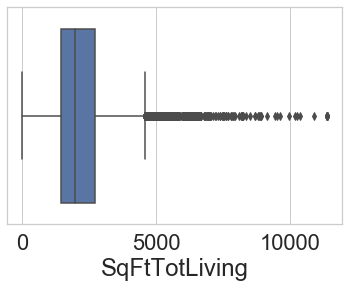

In [140]:
sns.boxplot(model_df['SqFtTotLiving'])

### Lets try adding Sq ft total living as a feature with building grade code

In [141]:
ssm_df = model_df[['SalePrice', 'SqFtTotLiving', 'BldgGrade']]
formula = 'SalePrice ~ SqFtTotLiving+BldgGrade'

In [142]:
ssm = smf.ols(formula=formula, data=ssm_df).fit()
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     3548.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:58:29   Log-Likelihood:            -4.4686e+05
No. Observations:               29895   AIC:                         8.937e+05
Df Residuals:                   29892   BIC:                         8.938e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.546e+05   3.27e+04    -29.196      0.000   -1.02e+06    -8.9e+05
SqFtTotLiving   177.0215      6.245     28.348      0.000     164.782     189.261
BldgGrade       1.81e+05   5306.218     34.102      0.000    1.71e+05    1.91e+05
==============================================================================
Omnibus:                    49740.589   Durbin-Watson:                   0.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         41471036.991
Skew:                          11.335   Prob(JB):                         0.00
Kurtosis:                     184.051   Cond. No.                     1.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Adding in the total sq footage increased our R-Squared score by just a bit but also raised our JB score.

In [156]:
corr_df.head()

,SalePrice,BldgGrade,SqFtTotLiving,SqFtOpenPorch,SqFtEnclosedPorch,BathFullCount,BathHalfCount,NbrLivingUnits,Bedrooms,SqFtGarageAttached,TidelandShoreland
0,560000,7,1930,180,0,2,0,1,3,550,0
1,435000,7,1975,45,0,1,0,1,3,465,0
2,550000,8,1560,0,0,1,1,1,2,240,0
3,409950,7,1850,0,0,2,1,1,3,0,0
4,380000,7,1750,670,0,1,1,1,4,510,0


In [17]:
from sklearn.preprocessing import power_transform

In [19]:
ptrans_df = corr_df
ptrans_df['saleprice'] = power_transform(np.array(corr_df['SalePrice']).reshape(-1,1))
ptrans_df['bldg_grade'] = power_transform(np.array(corr_df['BldgGrade']).reshape(-1,1))
ptrans_df['sqft_living'] = power_transform(np.array(corr_df['SqFtTotLiving']).reshape(-1,1))
ptrans_df['sqft_openporch'] = power_transform(np.array(corr_df['SqFtOpenPorch']).reshape(-1,1))
ptrans_df['sqft_closeporch'] = power_transform(np.array(corr_df['SqFtEnclosedPorch']).reshape(-1,1))
ptrans_df['full_bath_ct'] = power_transform(np.array(corr_df['BathFullCount']).reshape(-1,1))
ptrans_df['half_bath_ct'] = power_transform(np.array(corr_df['BathHalfCount']).reshape(-1,1))
ptrans_df['nbr_liv_unit_ct'] = power_transform(np.array(corr_df['NbrLivingUnits']).reshape(-1,1))
ptrans_df['bedrooms'] = power_transform(np.array(corr_df['Bedrooms']).reshape(-1,1))
ptrans_df['sqft_attatched_garage'] = power_transform(np.array(corr_df['SqFtGarageAttached']).reshape(-1,1))
ptrans_df['Tide_shore_land'] = power_transform(np.array(corr_df['TidelandShoreland']).reshape(-1,1))
ptrans_df['Township'] = power_transform(np.array(corr_df['Township']).reshape(-1,1))

In [199]:
ssm_df = model_df[['p_saleprice', 'p_sqftliving', 'p_bldgGrade']]
formula = 'p_saleprice ~ p_sqftliving+p_bldgGrade'

In [200]:
ssm = smf.ols(formula=formula, data=ssm_df).fit()
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            p_saleprice   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     7368.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:01:07   Log-Likelihood:                -36409.
No. Observations:               29881   AIC:                         7.282e+04
Df Residuals:                   29878   BIC:                         7.285e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.916e-15      0.005  -4.05e-13      1.000      -0.009       0.009
p_sqftliving     0.2145      0.007     31.151      0.000       0.201       0.228
p_bldgGrade      0.3998      0.007     58.066      0.000       0.386       0.413
==============================================================================
Omnibus:                     6497.188   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290996.220
Skew:                           0.087   Prob(JB):                         0.00
Kurtosis:                      18.287   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Power transforming the variables increased our R-Squared score by a descent amount to .33 and our JB still isn't great but this is the first time its under a million!!

#### Next, I will try to add the power transformed full bathroom count as an additional feature in the model.

In [202]:
model_df['p_fullbathct'] = power_transform(np.array(model_df['BathFullCount']).reshape(-1,1))

In [203]:
ssm_df = model_df[['p_saleprice', 'p_sqftliving', 'p_bldgGrade', 'p_fullbathct']]
formula = 'p_saleprice ~ p_sqftliving+p_bldgGrade+p_fullbathct'

ssm = smf.ols(formula=formula, data=ssm_df).fit()
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            p_saleprice   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     4937.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:13:43   Log-Likelihood:                -36384.
No. Observations:               29881   AIC:                         7.278e+04
Df Residuals:                   29877   BIC:                         7.281e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.916e-15      0.005  -4.05e-13      1.000      -0.009       0.009
p_sqftliving     0.2367      0.008     31.282      0.000       0.222       0.252
p_bldgGrade      0.4040      0.007     58.509      0.000       0.391       0.418
p_fullbathct    -0.0420      0.006     -7.058      0.000      -0.054      -0.030
==============================================================================
Omnibus:                     6498.325   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           293301.942
Skew:                           0.074   Prob(JB):                         0.00
Kurtosis:                      18.348   Cond. No.                         2.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### That didn't change our R-Squared value by very much, let's try adding in the number of living units as a feature

In [204]:
model_df['P_nbrunits'] = power_transform(np.array(model_df['NbrLivingUnits']).reshape(-1,1))

In [205]:
ssm_df = model_df[['p_saleprice', 'p_sqftliving', 'p_bldgGrade', 'p_fullbathct', 'P_nbrunits']]
formula = 'p_saleprice ~ p_sqftliving+p_bldgGrade+p_fullbathct+P_nbrunits'

ssm = smf.ols(formula=formula, data=ssm_df).fit()
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            p_saleprice   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     3729.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:15:50   Log-Likelihood:                -36349.
No. Observations:               29881   AIC:                         7.271e+04
Df Residuals:                   29876   BIC:                         7.275e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0049      0.005     -1.024      0.306      -0.014       0.004
p_sqftliving     0.2312      0.008     30.466      0.000       0.216       0.246
p_bldgGrade      0.4125      0.007     59.171      0.000       0.399       0.426
p_fullbathct    -0.0467      0.006     -7.809      0.000      -0.058      -0.035
P_nbrunits       0.0404      0.005      8.370      0.000       0.031       0.050
==============================================================================
Omnibus:                     6501.136   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           295103.662
Skew:                           0.065   Prob(JB):                         0.00
Kurtosis:                      18.395   Cond. No.                         2.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sn

### I am going to add the square feet of an open porch and closed porch as one additional feature.

In [207]:
model_df['OpClporch'] = model_df['SqFtOpenPorch'] + model_df['SqFtEnclosedPorch']

#### and now power transforming the values

In [209]:
model_df['p_opclPorch'] = power_transform(np.array(model_df['OpClporch']).reshape(-1,1))

In [210]:
ssm_df = model_df[['p_saleprice', 'p_sqftliving', 'p_bldgGrade', 'p_fullbathct', 'p_opclPorch']]
formula = 'p_saleprice ~ p_sqftliving+p_bldgGrade+p_fullbathct+p_opclPorch'

ssm = smf.ols(formula=formula, data=ssm_df).fit()
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            p_saleprice   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     3717.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:19:52   Log-Likelihood:                -36365.
No. Observations:               29881   AIC:                         7.274e+04
Df Residuals:                   29876   BIC:                         7.278e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.916e-15      0.005  -4.05e-13      1.000      -0.009       0.009
p_sqftliving     0.2274      0.008     29.485      0.000       0.212       0.243
p_bldgGrade      0.4029      0.007     58.354      0.000       0.389       0.416
p_fullbathct    -0.0447      0.006     -7.484      0.000      -0.056      -0.033
p_opclPorch      0.0313      0.005      6.113      0.000       0.021       0.041
==============================================================================
Omnibus:                     6480.564   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291568.163
Skew:                           0.061   Prob(JB):                         0.00
Kurtosis:                      18.303   Cond. No.                         3.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Let's try removing the power transformed full bathroom count and see how it affects our model

In [211]:
ssm_df = model_df[['p_saleprice', 'p_sqftliving', 'p_bldgGrade', 'p_opclPorch']]
formula = 'p_saleprice ~ p_sqftliving+p_bldgGrade+p_opclPorch'

ssm = smf.ols(formula=formula, data=ssm_df).fit()
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            p_saleprice   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     4928.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:21:04   Log-Likelihood:                -36393.
No. Observations:               29881   AIC:                         7.279e+04
Df Residuals:                   29877   BIC:                         7.283e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.916e-15      0.005  -4.05e-13      1.000      -0.009       0.009
p_sqftliving     0.2047      0.007     28.842      0.000       0.191       0.219
p_bldgGrade      0.3985      0.007     57.873      0.000       0.385       0.412
p_opclPorch      0.0285      0.005      5.584      0.000       0.019       0.039
==============================================================================
Omnibus:                     6478.978   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           289251.002
Skew:                           0.076   Prob(JB):                         0.00
Kurtosis:                      18.241   Cond. No.                         2.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### I would like to try removing the power transformed sale price and replacing it with the log transformed sale price to see how it affects the model. The predictor variables will still be power transformed.

In [213]:
ssm_df = model_df[['SalePriceLog', 'p_sqftliving', 'p_bldgGrade', 'p_fullbathct', 'p_opclPorch']]
formula = 'SalePriceLog ~ p_sqftliving+p_bldgGrade+p_fullbathct+p_opclPorch'

ssm = smf.ols(formula=formula, data=ssm_df).fit()
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     2808.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:24:48   Log-Likelihood:                -27674.
No. Observations:               29881   AIC:                         5.536e+04
Df Residuals:                   29876   BIC:                         5.540e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.3940      0.004   3789.512      0.000      13.387      13.401
p_sqftliving     0.1411      0.006     24.473      0.000       0.130       0.152
p_bldgGrade      0.2654      0.005     51.408      0.000       0.255       0.275
p_fullbathct    -0.0207      0.004     -4.633      0.000      -0.029      -0.012
p_opclPorch      0.0151      0.004      3.949      0.000       0.008       0.023
==============================================================================
Omnibus:                    24530.408   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1606690.718
Skew:                          -3.519   Prob(JB):                         0.00
Kurtosis:                      38.227   Cond. No.                         3.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### That did not work out the way I was hoping, back to the power transformed value!

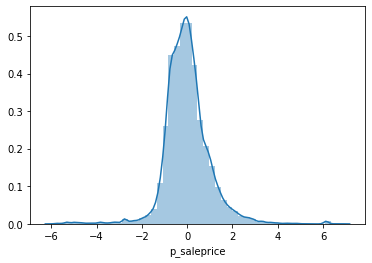

In [123]:
sns.distplot(model_df['p_saleprice'])

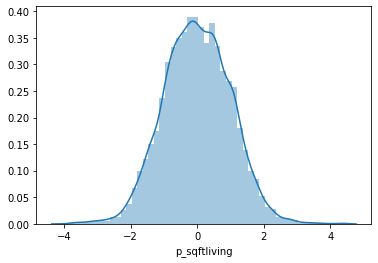

In [126]:
sns.distplot(model_df['p_sqftliving'])

### I need to start fitting my model to address the claims we have chosen. First, to address the claim that havinga porch increases home sale price. I'll start by using open and closed porch sq ft as seperate features, then try the combined feature.

In [215]:
model_df['p_oporch'] = power_transform(np.array(model_df['SqFtOpenPorch']).reshape(-1,1))
model_df['p_cporch'] = power_transform(np.array(model_df['SqFtEnclosedPorch']).reshape(-1,1))

In [216]:
ssm_df = model_df[['p_saleprice', 'p_oporch', 'p_cporch']]
formula = 'p_saleprice ~ p_oporch+p_cporch'

ssm = smf.ols(formula=formula, data=ssm_df).fit()
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            p_saleprice   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     803.4
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:31:14   Log-Likelihood:                -41617.
No. Observations:               29881   AIC:                         8.324e+04
Df Residuals:                   29878   BIC:                         8.326e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.916e-15      0.006   -3.4e-13      1.000      -0.011       0.011
p_oporch       0.2257      0.006     39.998      0.000       0.215       0.237
p_cporch      -0.0033      0.006     -0.591      0.555      -0.014       0.008
==============================================================================
Omnibus:                     4492.048   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65788.176
Skew:                           0.212   Prob(JB):                         0.00
Kurtosis:                      10.257   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Nope..

In [ ]:
ssm_df = model_df[['p_saleprice', 'p_opclPorch']]
formula = 'p_saleprice ~ p_opclPorch'

ssm = smf.ols(formula=formula, data=ssm_df).fit()
ssm.summary()

In [217]:
ssm_df = model_df[['p_saleprice', 'p_opclPorch', ]]
formula = 'p_saleprice ~ p_opclPorch'

ssm = smf.ols(formula=formula, data=ssm_df).fit()
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            p_saleprice   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1551.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:32:13   Log-Likelihood:                -41643.
No. Observations:               29881   AIC:                         8.329e+04
Df Residuals:                   29879   BIC:                         8.331e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.916e-15      0.006   -3.4e-13      1.000      -0.011       0.011
p_opclPorch     0.2222      0.006     39.385      0.000       0.211       0.233
==============================================================================
Omnibus:                     4484.969   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65883.402
Skew:                           0.207   Prob(JB):                         0.00
Kurtosis:                      10.263   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### There must be some outliers messing with the distribution of the values in open porch sq ft and enclosed porch sq ft.

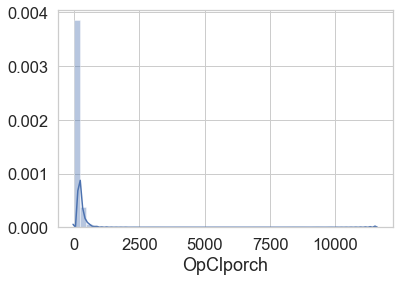

In [223]:
sns.distplot(model_df['OpClporch'])

In [224]:
ssm_df = model_df[['p_saleprice', 'OpClporch']]
formula = 'p_saleprice ~ OpClporch'

ssm = smf.ols(formula=formula, data=ssm_df).fit()
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            p_saleprice   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1671.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:35:15   Log-Likelihood:                -41586.
No. Observations:               29881   AIC:                         8.318e+04
Df Residuals:                   29879   BIC:                         8.319e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1307      0.006    -20.182      0.000      -0.143      -0.118
OpClporch      0.0015   3.77e-05     40.874      0.000       0.001       0.002
==============================================================================
Omnibus:                     5187.124   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123316.517
Skew:                           0.037   Prob(JB):                         0.00
Kurtosis:                      12.952   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### I'm going to try log transforming the open porch and closed porch sq ft columns
#### Since there are zeros in these two columns, I will replace them with 0.001 as to hopefully not throw our model off too much.

In [239]:
model_df['SqFtOpenPorch'].replace(to_replace=0, value=0.001, inplace=True)
model_df['SqFtEnclosedPorch'].replace(to_replace=0, value=0.001, inplace=True)

In [240]:
model_df['SqFtOpenPorch'].value_counts()

0.001      14272
40.000      1414
50.000      1207
60.000      1197
80.000       980
           ...  
588.000        1
281.000        1
22.000         1
288.000        1
263.000        1
Name: SqFtOpenPorch, Length: 376, dtype: int64

In [244]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29881 entries, 0 to 43866
Data columns (total 24 columns):
SalePrice             29881 non-null int64
BldgGrade             29881 non-null int64
SqFtTotLiving         29881 non-null int64
SqFtOpenPorch         29881 non-null float64
SqFtEnclosedPorch     29881 non-null float64
BathFullCount         29881 non-null int64
BathHalfCount         29881 non-null int64
NbrLivingUnits        29881 non-null int64
Bedrooms              29881 non-null int64
SqFtGarageAttached    29881 non-null int64
TidelandShoreland     29881 non-null int64
SalePriceLog          29881 non-null float64
log_saleprice         29881 non-null float64
p_bldgGrade           29881 non-null float64
p_saleprice           29881 non-null float64
p_sqftliving          29881 non-null float64
p_fullbathct          29881 non-null float64
P_nbrunits            29881 non-null float64
OpClporch             29881 non-null int64
p_opclPorch           29881 non-null float64
p_oporch   

In [262]:
model_df['log_oporch'] = np.log(model_df['SqFtOpenPorch'])
model_df['log_cporch'] = np.log(model_df['SqFtEnclosedPorch'])

In [253]:
import statsmodels.api as sm
sm.OLS(model_df.p_saleprice, ssm_df[['log_oporch', 'log_cporch']]).fit().summary()

MissingDataError: exog contains inf or nans

In [263]:
ssm_df = model_df[['p_saleprice', 'log_oporch', 'log_cporch']]
formula = 'p_saleprice ~ log_oporch+log_cporch'

ssm = smf.ols(formula=formula, data=ssm_df).fit()
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            p_saleprice   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     703.8
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          2.03e-299
Time:                        15:36:42   Log-Likelihood:                -41711.
No. Observations:               29881   AIC:                         8.343e+04
Df Residuals:                   29878   BIC:                         8.345e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0209      0.016      1.313      0.189      -0.010       0.052
log_oporch     0.0364      0.001     37.432      0.000       0.035       0.038
log_cporch    -0.0016      0.002     -0.683      0.495      -0.006       0.003
==============================================================================
Omnibus:                     4489.765   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64218.778
Skew:                           0.227   Prob(JB):                         0.00
Kurtosis:                      10.167   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [275]:
y = model_df.p_saleprice
X = model_df.drop('p_saleprice', axis=1)
X.drop('SalePrice', axis = 1, inplace = True)
X.drop(['SalePriceLog', 'log_saleprice', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'OpClporch', 'BathFullCount', 'BldgGrade', 'SqFtTotLiving', 'NbrLivingUnits', 'p_opclPorch'], axis = 1, inplace=True)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            p_saleprice   R-squared (uncentered):                   0.366
Model:                            OLS   Adj. R-squared (uncentered):              0.366
Method:                 Least Squares   F-statistic:                              1439.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:19:00   Log-Likelihood:                         -35582.
No. Observations:               29881   AIC:                                  7.119e+04
Df Residuals:                   29869   BIC:                                  7.129e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
BathHalfCount         -0.0342      0.010     -3.599      0.000      -0.053      -0.016
Bedrooms              -0.0769      0.007    -11.795      0.000      -0.090      -0.064
SqFtGarageAttached    -0.0005   1.88e-05    -27.357      0.000      -0.001      -0.000
TidelandShoreland      0.5772      0.026     22.190      0.000       0.526       0.628
p_bldgGrade            0.4240      0.007     59.660      0.000       0.410       0.438
p_sqftliving           0.3113      0.009     33.656      0.000       0.293       0.329
p_fullbathct          -0.0167      0.006     -2.811      0.005      -0.028      -0.005
P_nbrunits             0.0335      0.005      7.025      0.000       0.024       0.043
p_oporch               0.1739      0.039      4.426      0.000       0.097       0.251
p_cporch               0.1574      0.010     15.303      0.000       0.137       0.178
log_oporch            -0.0230      0.007     -3.437      0.001      -0.036      -0.010
log_cporch            -0.0600      0.004    -15.616      0.000      -0.068      -0.052
==============================================================================
Omnibus:                     7006.954   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380269.306
Skew:                          -0.173   Prob(JB):                         0.00
Kurtosis:                      20.473   Cond. No.                     3.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### I'm going to create a new dataframe with only power transformed values and begin iterating over the model. Creating the dataframe from the corr_df used at the beginning of this notebook. That is the notebook that has the outliers taken out of the saleprice column as well as the zeros removed. I have already power transformed the sale price column for previous models but I creating this dataframe to have all of the variables in the model on the same scale.

In [171]:
ptrans_df = corr_df
ptrans_df['saleprice'] = power_transform(np.array(model_df['SalePrice']).reshape(-1,1))
ptrans_df['bldg_grade'] = power_transform(np.array(model_df['BldgGrade']).reshape(-1,1))
ptrans_df['sqft_living'] = power_transform(np.array(model_df['SqFtTotLiving']).reshape(-1,1))
ptrans_df['sqft_openporch'] = power_transform(np.array(model_df['SqFtOpenPorch']).reshape(-1,1))
ptrans_df['sqft_closeporch'] = power_transform(np.array(model_df['SqFtEnclosedPorch']).reshape(-1,1))
ptrans_df['full_bath_ct'] = power_transform(np.array(model_df['BathFullCount']).reshape(-1,1))
ptrans_df['half_bath_ct'] = power_transform(np.array(model_df['BathHalfCount']).reshape(-1,1))
ptrans_df['nbr_liv_unit_ct'] = power_transform(np.array(model_df['NbrLivingUnits']).reshape(-1,1))
ptrans_df['bedrooms'] = power_transform(np.array(model_df['Bedrooms']).reshape(-1,1))
ptrans_df['sqft_attatched_garage'] = power_transform(np.array(model_df['SqFtGarageAttached']).reshape(-1,1))
ptrans_df['Tide_shore_land'] = power_transform(np.array(model_df['TidelandShoreland']).reshape(-1,1))

### Now I need to drop the original columns from the dataframe so I am left with only power transformed values.

In [176]:
list(ptrans_df.columns)

['SalePrice',
 'BldgGrade',
 'SqFtTotLiving',
 'SqFtOpenPorch',
 'SqFtEnclosedPorch',
 'BathFullCount',
 'BathHalfCount',
 'NbrLivingUnits',
 'Bedrooms',
 'SqFtGarageAttached',
 'TidelandShoreland',
 'saleprice',
 'bldg_grade',
 'sqft_living',
 'sqft_openporch',
 'sqft_closeporch',
 'full_bath_ct',
 'half_bath_ct',
 'nbr_liv_unit_ct',
 'bedrooms',
 'sqft_attatched_garage',
 'Tide_shore_land']

In [177]:
ptrans_df.drop(['SalePrice',
 'BldgGrade',
 'SqFtTotLiving',
 'SqFtOpenPorch',
 'SqFtEnclosedPorch',
 'BathFullCount',
 'BathHalfCount',
 'NbrLivingUnits',
 'Bedrooms',
 'SqFtGarageAttached',
 'TidelandShoreland',], axis=1, inplace=True)

In [178]:
ptrans_df

,saleprice,bldg_grade,sqft_living,sqft_openporch,sqft_closeporch,full_bath_ct,half_bath_ct,nbr_liv_unit_ct,bedrooms,sqft_attatched_garage,Tide_shore_land
0,-0.306253,-0.563477,-0.097246,1.126966,-0.223312,0.647132,-0.920754,0.000000,-0.411444,1.011461,-0.092937
1,-0.658122,-0.563477,-0.047299,0.599458,-0.223312,-0.803817,-0.920754,0.000000,-0.411444,0.951378,-0.092937
2,-0.332015,0.295264,-0.543531,-1.020480,-0.223312,-0.803817,1.051571,0.000000,-1.461115,0.717999,-0.092937
3,-0.737911,-0.563477,-0.188149,-1.020480,-0.223312,0.647132,1.051571,0.000000,-0.411444,-1.045223,-0.092937
4,-0.838442,-0.563477,-0.305847,1.607784,-0.223312,-0.803817,1.051571,0.000000,0.575434,0.984396,-0.092937
...,...,...,...,...,...,...,...,...,...,...,...
43862,0.463142,0.295264,0.574068,-1.020480,-0.223312,0.647132,-0.920754,0.000000,-0.411444,-1.045223,-0.092937
43863,0.320285,0.295264,0.211142,0.553952,-0.223312,0.647132,1.051571,0.000000,-0.411444,0.931675,-0.092937
43864,-0.008833,-0.563477,-0.119714,0.820496,-0.223312,-0.803817,-0.920754,8.299547,0.575434,-1.045223,-0.092937
43865,0.010733,0.295264,0.501003,1.372832,-0.223312,0.647132,1.051571,0.000000,0.575434,0.991349,-0.092937


In [179]:
y = ptrans_df['saleprice']
X = ptrans_df.drop('saleprice', axis=1)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.364
Model:                            OLS   Adj. R-squared (uncentered):              0.364
Method:                 Least Squares   F-statistic:                              1710.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:40:11   Log-Likelihood:                         -35656.
No. Observations:               29895   AIC:                                  7.133e+04
Df Residuals:                   29885   BIC:                                  7.142e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bldg_grade                0.4141      0.007     58.623      0.000       0.400       0.428
sqft_living               0.3028      0.009     33.163      0.000       0.285       0.321
sqft_openporch            0.0387      0.005      7.606      0.000       0.029       0.049
sqft_closeporch           0.0078      0.005      1.660      0.097      -0.001       0.017
full_bath_ct             -0.0123      0.006     -2.064      0.039      -0.024      -0.001
half_bath_ct             -0.0202      0.005     -3.972      0.000      -0.030      -0.010
nbr_liv_unit_ct           0.0283      0.005      5.970      0.000       0.019       0.038
bedrooms                 -0.0727      0.007    -10.884      0.000      -0.086      -0.060
sqft_attatched_garage    -0.1538      0.005    -29.711      0.000      -0.164      -0.144
Tide_shore_land           0.0924      0.005     19.875      0.000       0.083       0.102
==============================================================================
Omnibus:                     7202.162   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           443130.662
Skew:                          -0.149   Prob(JB):                         0.00
Kurtosis:                      21.859   Cond. No.                         4.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### An R-Squared of .364 isn't that great, lets try removing the full bath and half bath features.

In [221]:
y = ptrans_df['saleprice']
X = ptrans_df.drop(['saleprice', 'sqft_closeporch'], axis=1)
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.364
Model:                            OLS   Adj. R-squared (uncentered):              0.364
Method:                 Least Squares   F-statistic:                              1899.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                        0.00
Time:                        00:14:51   Log-Likelihood:                         -35658.
No. Observations:               29895   AIC:                                  7.133e+04
Df Residuals:                   29886   BIC:                                  7.141e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bldg_grade                0.4146      0.007     58.749      0.000       0.401       0.428
sqft_living               0.3024      0.009     33.130      0.000       0.284       0.320
sqft_openporch            0.0387      0.005      7.607      0.000       0.029       0.049
full_bath_ct             -0.0126      0.006     -2.118      0.034      -0.024      -0.001
half_bath_ct             -0.0204      0.005     -4.015      0.000      -0.030      -0.010
nbr_liv_unit_ct           0.0284      0.005      5.977      0.000       0.019       0.038
bedrooms                 -0.0729      0.007    -10.900      0.000      -0.086      -0.060
sqft_attatched_garage    -0.1548      0.005    -30.097      0.000      -0.165      -0.145
Tide_shore_land           0.0924      0.005     19.871      0.000       0.083       0.101
==============================================================================
Omnibus:                     7199.276   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           442706.799
Skew:                          -0.148   Prob(JB):                         0.00
Kurtosis:                      21.850   Cond. No.                         4.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Before going any further lets check to see if the model meets the assumptions.
### The linearity assumption asumes the input variable linearly predicts the output variable. I am going to be using the Rainbow test from StatsModels.

In [189]:
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [192]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model2)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.29885099779322
Rainbow p-value: 1.2394995317735481e-57


#### With a pvalue this low, the model violates the linearity assumption.

#### Checking for normality next, doing so with a qqplot. I want the qq to be a straight line. With a JB score pvalue of 0, the model violates the normality assumption


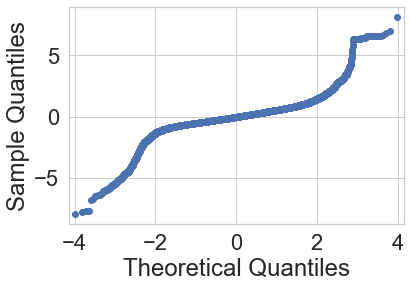

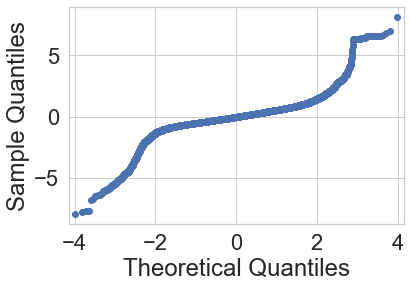

In [197]:
model2_resids = model2.resid
sm.qqplot(model2_resids)

In [205]:
model2_resids

0        0.037723
1       -0.336453
2       -0.226028
3       -0.561434
4       -0.360253
           ...   
43862    0.012760
43863    0.265048
43864   -0.146255
43865   -0.082673
43866    0.119644
Length: 29895, dtype: float64

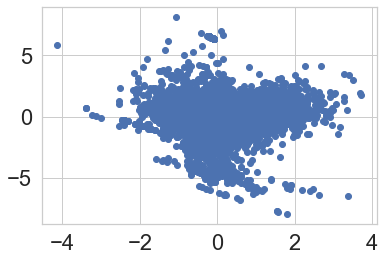

In [199]:
y_hat = model2.predict()
fig, ax = plt.subplots()
ax.scatter(y_hat, model2_resids);

In [211]:
lm, lm_pvalue, fstat, p_fstat = het_breuschpagan(model2_resids, ptrans_df[['saleprice']])
print("Lagrange Multiplier p-value:", lm_pvalue)
print("F-statistic p-value:", p_fstat)

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.1366957417052875


### The low pvalue above shows that the model violates the homoscadasticity assumption.

In [212]:
np.array(ptrans_df.columns)

array(['saleprice', 'bldg_grade', 'sqft_living', 'sqft_openporch',
       'sqft_closeporch', 'full_bath_ct', 'half_bath_ct',
       'nbr_liv_unit_ct', 'bedrooms', 'sqft_attatched_garage',
       'Tide_shore_land'], dtype=object)

In [218]:
rows = ptrans_df[['saleprice', 'bldg_grade', 'sqft_living', 'sqft_openporch',
       'sqft_closeporch', 'full_bath_ct', 'half_bath_ct',
       'nbr_liv_unit_ct', 'bedrooms', 'sqft_attatched_garage',
       'Tide_shore_land']].values
vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(rows, i) for i in range(11)]
vif_df

,VIF
0,1.572143
1,2.614325
2,4.060954
3,1.215461
4,1.027916
5,1.666872
6,1.218488
7,1.058671
8,2.107271
9,1.295893


#### Generally a variance inflation factor of 5 is too high, the dataframe above shows that the model does not violate the independence assumption. 

### I'm going to try removing a couple more features.

In [260]:
y = ptrans_df['saleprice']
X = ptrans_df.drop(['saleprice', 'sqft_closeporch', 'full_bath_ct'], axis=1)
model2 = sm.OLS(y, sm.add_constant(X)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     2136.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:46:42   Log-Likelihood:                -35660.
No. Observations:               29895   AIC:                         7.134e+04
Df Residuals:                   29886   BIC:                         7.141e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0034      0.005     -0.723      0.470      -0.012       0.006
bldg_grade                0.4131      0.007     58.859      0.000       0.399       0.427
sqft_living               0.2981      0.009     33.487      0.000       0.281       0.316
sqft_openporch            0.0378      0.005      7.456      0.000       0.028       0.048
half_bath_ct             -0.0205      0.005     -4.036      0.000      -0.031      -0.011
nbr_liv_unit_ct           0.0279      0.005      5.860      0.000       0.019       0.037
bedrooms                 -0.0749      0.007    -11.311      0.000      -0.088      -0.062
sqft_attatched_garage    -0.1557      0.005    -30.405      0.000      -0.166      -0.146
Tide_shore_land           0.0927      0.005     19.958      0.000       0.084       0.102
==============================================================================
Omnibus:                     7193.456   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           442562.926
Skew:                          -0.144   Prob(JB):                         0.00
Kurtosis:                      21.847   Cond. No.                         4.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [256]:
y = ptrans_df['saleprice']
X = ptrans_df.drop(['saleprice', 'sqft_closeporch', 'full_bath_ct', 'half_bath_ct'], axis=1)
model2 = sm.OLS(y, sm.add_constant(X)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     2438.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:44:57   Log-Likelihood:                -35668.
No. Observations:               29895   AIC:                         7.135e+04
Df Residuals:                   29887   BIC:                         7.142e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0034      0.005     -0.732      0.464      -0.013       0.006
bldg_grade                0.4078      0.007     59.131      0.000       0.394       0.421
sqft_living               0.2948      0.009     33.249      0.000       0.277       0.312
sqft_openporch            0.0373      0.005      7.366      0.000       0.027       0.047
nbr_liv_unit_ct           0.0283      0.005      5.934      0.000       0.019       0.038
bedrooms                 -0.0735      0.007    -11.111      0.000      -0.086      -0.061
sqft_attatched_garage    -0.1582      0.005    -31.094      0.000      -0.168      -0.148
Tide_shore_land           0.0931      0.005     20.041      0.000       0.084       0.102
==============================================================================
Omnibus:                     7175.707   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           435774.130
Skew:                          -0.148   Prob(JB):                         0.00
Kurtosis:                      21.702   Cond. No.                         3.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding a constant didn't really make a difference.

### I'm going to get the original values for the categoricals and one hot encode them.

In [271]:
np.array(df.columns)

array(['ExciseTaxNbr', 'Major', 'Minor', 'DocumentDate', 'SalePrice',
       'RecordingNbr', 'Volume', 'Page', 'PlatNbr', 'PlatType',
       'PlatLot_x', 'PlatBlock_x', 'SellerName', 'BuyerName',
       'PropertyType', 'PrincipalUse', 'SaleInstrument', 'AFForestLand',
       'AFCurrentUseLand', 'AFNonProfitUse', 'AFHistoricProperty',
       'SaleReason', 'PropertyClass', 'SaleWarning', 'BldgNbr',
       'NbrLivingUnits', 'Address', 'BuildingNumber', 'Fraction',
       'DirectionPrefix', 'StreetName', 'StreetType', 'DirectionSuffix',
       'ZipCode', 'Stories', 'BldgGrade', 'BldgGradeVar', 'SqFt1stFloor',
       'SqFtHalfFloor', 'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull',
       'SqFtUnfinHalf', 'SqFtTotLiving', 'SqFtTotBasement',
       'SqFtFinBasement', 'FinBasementGrade', 'SqFtGarageBasement',
       'SqFtGarageAttached', 'DaylightBasement', 'SqFtOpenPorch',
       'SqFtEnclosedPorch', 'SqFtDeck', 'HeatSystem', 'HeatSource',
       'BrickStone', 'ViewUtilization', 'Bedrooms'

In [81]:
ptrans_df['bldg_grade'] = df['BldgGrade']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
ptrans_df['half_bath_ct'] = df['BathHalfCount']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
ptrans_df['Tide_shore_land'] = df['TidelandShoreland']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
ptrans_df['saleprice'] = df['SalePrice']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
ptrans_df['bedrooms'] = df['Bedrooms']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
ptrans_df['full_bath_ct'] = df['BathFullCount']

In [88]:
ptrans_df['sqft_living'] = df['SqFtTotLiving']
ptrans_df['nbr_liv_unit_ct'] = df['NbrLivingUnits']
ptrans_df['sqft_closeporch'] = df['SqFtEnclosedPorch']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [90]:
ptrans_df['sqft_openporch'] = df['SqFtOpenPorch']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
ptrans_df.shape

(29895, 10)

In [279]:
np.array(ptrans_df.columns)

array(['saleprice', 'bldg_grade', 'sqft_living', 'sqft_openporch',
       'sqft_closeporch', 'full_bath_ct', 'half_bath_ct',
       'nbr_liv_unit_ct', 'bedrooms', 'sqft_attatched_garage',
       'Tide_shore_land'], dtype=object)

In [291]:
model2_2_df = ptrans_df[['saleprice', 'bldg_grade', 'sqft_living', 'sqft_openporch',
       'sqft_closeporch', 'full_bath_ct', 'half_bath_ct',
       'nbr_liv_unit_ct', 'bedrooms', 'sqft_attatched_garage',
       'Tide_shore_land']]
formula = 'saleprice ~ sqft_living+bldg_grade+sqft_closeporch+sqft_openporch+C(nbr_liv_unit_ct)+C(bedrooms)+C(full_bath_ct)+C(half_bath_ct)+C(Tide_shore_land)'
model2_2 = smf.ols(formula=formula, data=model2_2_df).fit()
model2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     490.5
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:16:42   Log-Likelihood:                -35787.
No. Observations:               29895   AIC:                         7.164e+04
Df Residuals:                   29860   BIC:                         7.193e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.5486      0.071      7.758      0.000       0.410       0.687
C(nbr_liv_unit_ct)[T.2]     0.3523      0.045      7.767      0.000       0.263       0.441
C(nbr_liv_unit_ct)[T.3]     0.3531      0.088      4.012      0.000       0.181       0.526
C(nbr_liv_unit_ct)[T.4]    -1.4717      0.542     -2.716      0.007      -2.534      -0.410
C(nbr_liv_unit_ct)[T.6]   -1.1e-14      0.507  -2.17e-14      1.000      -0.994       0.994
C(bedrooms)[T.1]            0.1989      0.082      2.415      0.016       0.037       0.360
C(bedrooms)[T.2]           -0.2512      0.077     -3.244      0.001      -0.403      -0.099
C(bedrooms)[T.3]           -0.4662      0.078     -5.993      0.000      -0.619      -0.314
C(bedrooms)[T.4]           -0.5249      0.079     -6.651      0.000      -0.680      -0.370
C(bedrooms)[T.5]           -0.4467      0.081     -5.543      0.000      -0.605      -0.289
C(bedrooms)[T.6]           -0.5433      0.089     -6.086      0.000      -0.718      -0.368
C(bedrooms)[T.7]           -0.3917      0.147     -2.656      0.008      -0.681      -0.103
C(bedrooms)[T.8]           -1.1758      0.166     -7.091      0.000      -1.501      -0.851
C(bedrooms)[T.9]           -0.3985      0.250     -1.591      0.112      -0.889       0.092
C(bedrooms)[T.10]          -0.5393      0.409     -1.317      0.188      -1.342       0.263
C(bedrooms)[T.13]          -0.7490      0.437     -1.716      0.086      -1.605       0.107
C(bedrooms)[T.14]          -2.2360      0.500     -4.468      0.000      -3.217      -1.255
C(full_bath_ct)[T.1]       -0.0496      0.040     -1.250      0.211      -0.127       0.028
C(full_bath_ct)[T.2]       -0.1565      0.041     -3.842      0.000      -0.236      -0.077
C(full_bath_ct)[T.3]       -0.0578      0.044     -1.308      0.191      -0.144       0.029
C(full_bath_ct)[T.4]        0.1193      0.063      1.909      0.056      -0.003       0.242
C(full_bath_ct)[T.5]        0.4131      0.143      2.884      0.004       0.132       0.694
C(full_bath_ct)[T.6]        0.0335      0.338      0.099      0.921      -0.629       0.696
C(full_bath_ct)[T.7]        1.3167      0.816      1.614      0.106      -0.282       2.915
C(half_bath_ct)[T.1]       -0.0556      0.010     -5.379      0.000      -0.076      -0.035
C(half_bath_ct)[T.2]        0.1793      0.042      4.291      0.000       0.097       0.261
C(half_bath_ct)[T.3]        0.4419      0.149      2.964      0.003       0.150       0.734
C(half_bath_ct)[T.4]       -0.2820      0.403     -0.700      0.484      -1.072       0.508
C(half_bath_ct)[T.5]       -0.7490      0.437     -1.716      0.086      -1.605       0.107
C(Tide_shore_land)[T.1]     0.8116      0.195      4.168      0.000       0.430       1.193
C(Tide_shore_land)[T.2]     0.9568      0.053  

In [300]:
model2_2_df = ptrans_df[['saleprice', 'bldg_grade', 'sqft_living', 'sqft_openporch',
       'sqft_closeporch', 'full_bath_ct', 'half_bath_ct',
       'nbr_liv_unit_ct', 'bedrooms', 'sqft_attatched_garage',
       'Tide_shore_land']]
formula = 'saleprice ~ sqft_living+C(bldg_grade)+C(nbr_liv_unit_ct)'
model2_2 = smf.ols(formula=formula, data=model2_2_df).fit()
model2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     948.1
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:25:20   Log-Likelihood:                -35970.
No. Observations:               29895   AIC:                         7.198e+04
Df Residuals:                   29877   BIC:                         7.213e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                2.3471      0.807      2.910      0.004       0.766       3.928
C(bldg_grade)[T.-6.5134456417878805]    -4.5788      0.871     -5.258      0.000      -6.286      -2.872
C(bldg_grade)[T.-4.970670006340344]     -4.1908      0.819     -5.116      0.000      -5.796      -2.585
C(bldg_grade)[T.-3.6645745301935837]    -3.3839      0.811     -4.171      0.000      -4.974      -1.794
C(bldg_grade)[T.-2.520611785309211]     -2.7334      0.807     -3.386      0.001      -4.316      -1.151
C(bldg_grade)[T.-1.4959613075147162]    -2.8076      0.806     -3.481      0.000      -4.388      -1.227
C(bldg_grade)[T.-0.5634771904546911]    -2.6271      0.806     -3.257      0.001      -4.208      -1.046
C(bldg_grade)[T.0.2952641401142376]     -2.3297      0.807     -2.888      0.004      -3.911      -0.749
C(bldg_grade)[T.1.093409645075543]      -1.8866      0.807     -2.338      0.019      -3.468      -0.305
C(bldg_grade)[T.1.8407093066789955]     -1.4152      0.807     -1.753      0.080      -2.997       0.167
C(bldg_grade)[T.2.544618111035321]      -0.8770      0.808     -1.086      0.278      -2.461       0.707
C(bldg_grade)[T.3.2109795751753736]     -0.2793      0.810     -0.345      0.730      -1.867       1.309
C(bldg_grade)[T.3.8444693996150043]      0.5561      0.822      0.676      0.499      -1.056       2.168
C(nbr_liv_unit_ct)[T.2]                  0.3153      0.045      7.013      0.000       0.227       0.403
C(nbr_liv_unit_ct)[T.3]                  0.4704      0.083      5.643      0.000       0.307       0.634
C(nbr_liv_unit_ct)[T.4]                 -0.7315      0.361     -2.023      0.043      -1.440      -0.023
C(nbr_liv_unit_ct)[T.6]                 -0.9512      0.362     -2.627      0.009      -1.661      -0.242
sqft_living                              0.1991      0.007     28.810      0.000       0.186       0.213
==============================================================================
Omnibus:                     6780.343   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           359212.367
Skew:                           0.021   Prob(JB):                         0.00
Kurtosis:                      19.982   Cond. No.                         706.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
ptrans_df['sqft_openporch'] = df['SqFtOpenPorch']
ptrans_df['sqft_closeporch'] = df['SqFtEnclosedPorch']
ptrans_df

,saleprice,bldg_grade,sqft_living,sqft_openporch,sqft_closeporch,full_bath_ct,half_bath_ct,nbr_liv_unit_ct,bedrooms,sqft_attatched_garage,Tide_shore_land
0,-0.306253,-0.563477,-0.097246,180,0,2,0,1,3,1.011461,0
1,-0.658122,-0.563477,-0.047299,45,0,1,0,1,3,0.951378,0
2,-0.332015,0.295264,-0.543531,0,0,1,1,1,2,0.717999,0
3,-0.737911,-0.563477,-0.188149,0,0,2,1,1,3,-1.045223,0
4,-0.838442,-0.563477,-0.305847,670,0,1,1,1,4,0.984396,0
...,...,...,...,...,...,...,...,...,...,...,...
43862,0.463142,0.295264,0.574068,0,0,2,0,1,3,-1.045223,0
43863,0.320285,0.295264,0.211142,40,0,2,1,1,3,0.931675,0
43864,-0.008833,-0.563477,-0.119714,80,0,1,0,2,4,-1.045223,0
43865,0.010733,0.295264,0.501003,350,0,2,1,1,4,0.991349,0


In [313]:
has_porch = [1 if ((o>0)|(c>0)) else 0 for o, c in zip(ptrans_df['sqft_openporch'], ptrans_df['sqft_closeporch'])]
ptrans_df['has_porch'] = has_porch

In [315]:
ptrans_df

,saleprice,bldg_grade,sqft_living,sqft_openporch,sqft_closeporch,full_bath_ct,half_bath_ct,nbr_liv_unit_ct,bedrooms,sqft_attatched_garage,Tide_shore_land,has_porch
0,-0.306253,-0.563477,-0.097246,180,0,2,0,1,3,1.011461,0,1
1,-0.658122,-0.563477,-0.047299,45,0,1,0,1,3,0.951378,0,1
2,-0.332015,0.295264,-0.543531,0,0,1,1,1,2,0.717999,0,0
3,-0.737911,-0.563477,-0.188149,0,0,2,1,1,3,-1.045223,0,0
4,-0.838442,-0.563477,-0.305847,670,0,1,1,1,4,0.984396,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43862,0.463142,0.295264,0.574068,0,0,2,0,1,3,-1.045223,0,0
43863,0.320285,0.295264,0.211142,40,0,2,1,1,3,0.931675,0,1
43864,-0.008833,-0.563477,-0.119714,80,0,1,0,2,4,-1.045223,0,1
43865,0.010733,0.295264,0.501003,350,0,2,1,1,4,0.991349,0,1


In [329]:
model2_2_df = ptrans_df[['saleprice', 'bldg_grade', 'has_porch', 'sqft_living', 'full_bath_ct', 'half_bath_ct',
       'nbr_liv_unit_ct', 'bedrooms', 'sqft_attatched_garage',
       'Tide_shore_land']]
formula = 'saleprice ~ sqft_living+sqft_attatched_garage+C(bldg_grade)+C(nbr_liv_unit_ct)+has_porch+C(full_bath_ct)+C(half_bath_ct)'
model2_2 = smf.ols(formula=formula, data=sm.add_constant(model2_2_df)).fit()
model2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     573.2
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:59:22   Log-Likelihood:                -35440.
No. Observations:               29895   AIC:                         7.094e+04
Df Residuals:                   29863   BIC:                         7.121e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                2.3399      0.793      2.952      0.003       0.786       3.893
C(bldg_grade)[T.-6.5134456417878805]    -4.5900      0.856     -5.364      0.000      -6.267      -2.913
C(bldg_grade)[T.-4.970670006340344]     -4.2426      0.805     -5.271      0.000      -5.820      -2.665
C(bldg_grade)[T.-3.6645745301935837]    -3.4132      0.797     -4.281      0.000      -4.976      -1.851
C(bldg_grade)[T.-2.520611785309211]     -2.7233      0.794     -3.430      0.001      -4.279      -1.167
C(bldg_grade)[T.-1.4959613075147162]    -2.7694      0.793     -3.491      0.000      -4.324      -1.215
C(bldg_grade)[T.-0.5634771904546911]    -2.5204      0.793     -3.177      0.001      -4.075      -0.966
C(bldg_grade)[T.0.2952641401142376]     -2.1959      0.793     -2.768      0.006      -3.751      -0.641
C(bldg_grade)[T.1.093409645075543]      -1.7539      0.794     -2.210      0.027      -3.309      -0.199
C(bldg_grade)[T.1.8407093066789955]     -1.2802      0.794     -1.613      0.107      -2.836       0.276
C(bldg_grade)[T.2.544618111035321]      -0.7629      0.795     -0.960      0.337      -2.320       0.794
C(bldg_grade)[T.3.2109795751753736]     -0.2225      0.797     -0.279      0.780      -1.784       1.339
C(bldg_grade)[T.3.8444693996150043]      0.4777      0.809      0.590      0.555      -1.109       2.064
C(nbr_liv_unit_ct)[T.2]                  0.2283      0.045      5.107      0.000       0.141       0.316
C(nbr_liv_unit_ct)[T.3]                  0.2392      0.084      2.853      0.004       0.075       0.403
C(nbr_liv_unit_ct)[T.4]                 -1.3190      0.360     -3.662      0.000      -2.025      -0.613
C(nbr_liv_unit_ct)[T.6]                 -0.6540      0.430     -1.521      0.128      -1.497       0.189
C(full_bath_ct)[T.1]                    -0.1013      0.037     -2.724      0.006      -0.174      -0.028
C(full_bath_ct)[T.2]                    -0.1669      0.038     -4.361      0.000      -0.242      -0.092
C(full_bath_ct)[T.3]                    -0.1132      0.042     -2.706      0.007      -0.195      -0.031
C(full_bath_ct)[T.4]                     0.0123      0.061      0.202      0.840      -0.107       0.131
C(full_bath_ct)[T.5]                     0.1504      0.142      1.059      0.290      -0.128       0.429
C(full_bath_ct)[T.6]                    -0.9229      0.246     -3.745      0.000      -1.406      -0.440
C(full_bath_ct)[T.7]                     0.2581      0.794      0.325      0.745      -1.297       1.814
C(half_bath_ct)[T.1]                    -0.0270      0.010     -2.632      0.008      -0.047      -0.007
C(half_bath_ct)[T.2]                     0.0589      0.041      1.422      0.155      -0.022       0.140
C(half_bath_ct)[T.3]                  

In [323]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model2_2)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.303920590542143
Rainbow p-value: 2.9885969378700113e-59


### We are still violating the linearity assumption

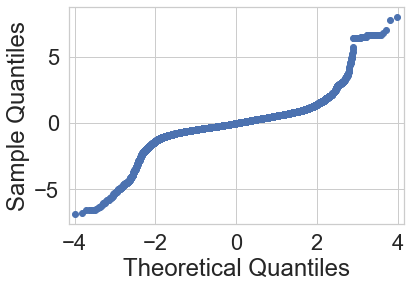

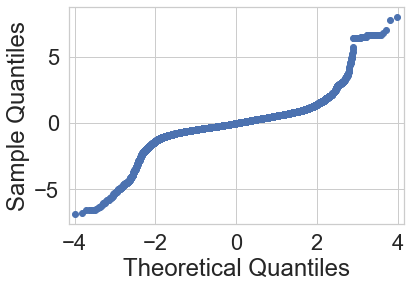

In [324]:
model2_2resids = model2_2.resid
sm.qqplot(model2_2resids)

In [325]:
lm, lm_pvalue, fstat, p_fstat = het_breuschpagan(model2_2resids, ptrans_df[['saleprice']])
print("Lagrange Multiplier p-value:", lm_pvalue)
print("F-statistic p-value:", p_fstat)

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.27499207355268473


### Still violating the homoscadasticity assumption as well

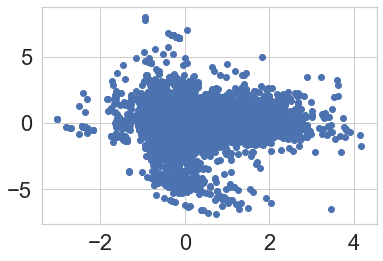

In [326]:
y_hat = model2_2.predict()
fig, ax = plt.subplots()
ax.scatter(y_hat, model2_2resids);

In [327]:
rows = ptrans_df[['saleprice', 'bldg_grade', 'sqft_living', 'sqft_openporch',
       'sqft_closeporch', 'full_bath_ct', 'half_bath_ct',
       'nbr_liv_unit_ct', 'bedrooms', 'sqft_attatched_garage',
       'Tide_shore_land']].values
vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(rows, i) for i in range(11)]
vif_df

,VIF
0,1.569835
1,2.574925
2,3.174851
3,1.523562
4,1.029716
5,9.217903
6,2.151562
7,21.712230
8,20.400843
9,1.267645


### The table above shows that we are violating the independence assumption now

,SalePrice,BldgGrade,SqFtTotLiving,SqFtOpenPorch,SqFtEnclosedPorch,BathFullCount,BathHalfCount,NbrLivingUnits,Bedrooms,SqFtGarageAttached,...,bldg_grade,sqft_living,sqft_openporch,sqft_closeporch,full_bath_ct,half_bath_ct,nbr_liv_unit_ct,bedrooms,sqft_attatched_garage,Tide_shore_land
0,560000,7,1930,180,0,2,0,1,3,550,...,7,-0.097246,1.126966,-0.223312,2,0,0.000000,3,1.011461,0
1,435000,7,1975,45,0,1,0,1,3,465,...,7,-0.047299,0.599458,-0.223312,1,0,0.000000,3,0.951378,0
2,550000,8,1560,0,0,1,1,1,2,240,...,8,-0.543531,-1.020480,-0.223312,1,1,0.000000,2,0.717999,0
3,409950,7,1850,0,0,2,1,1,3,0,...,7,-0.188149,-1.020480,-0.223312,2,1,0.000000,3,-1.045223,0
4,380000,7,1750,670,0,1,1,1,4,510,...,7,-0.305847,1.607784,-0.223312,1,1,0.000000,4,0.984396,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43862,930000,8,2600,0,0,2,0,1,3,0,...,8,0.574068,-1.020480,-0.223312,2,0,0.000000,3,-1.045223,0
43863,850000,8,2220,40,0,2,1,1,3,440,...,8,0.211142,0.553952,-0.223312,2,1,0.000000,3,0.931675,0
43864,686000,7,1910,80,0,1,0,2,4,0,...,7,-0.119714,0.820496,-0.223312,1,0,8.299547,4,-1.045223,0
43865,695000,8,2520,350,0,2,1,1,4,520,...,8,0.501003,1.372832,-0.223312,2,1,0.000000,4,0.991349,0


In [31]:
ptrans_df[['bldg_grade', 'full_bath_ct', 'half_bath_ct']]

,bldg_grade,full_bath_ct,half_bath_ct
0,7,2,0
1,7,1,0
2,8,1,1
3,7,2,1
4,7,1,1
...,...,...,...
43862,8,2,0
43863,8,2,1
43864,7,1,0
43865,8,2,1


In [60]:

def dummify(df, column_names):
    dataframes = []
    copy_df = df.copy()
    for column in column_names:
        new_df = pd.get_dummies(df[column], drop_first=True)
        new_df.columns = [column + '_' + str(name) for name in new_df]
        dataframes.append(new_df)
        copy_df.drop(column, axis = 1, inplace = True)
    new_df = pd.concat(dataframes, axis=1)
    return pd.concat([copy_df, new_df], axis = 1)

In [93]:
def pow_transformer(df , column_names):
    dataframe = []
    copy_df = df.copy()
    for column in column_names:
        new_df = power_transform(np.array(df[column]).reshape(-1,1))
        new_df.columns = [column + '_' + str(name) for name in new_df]
        dataframes.append(new_df)
        copy_df.drop(column, axis=1, inplace=True)
    new_df = pd.concat(dataframes, axis=1)
    return pd.concat([copy_df, new_df], axis=1)

In [65]:
ptrans_df

,SalePrice,BldgGrade,SqFtTotLiving,SqFtOpenPorch,SqFtEnclosedPorch,BathHalfCount,NbrLivingUnits,Bedrooms,SqFtGarageAttached,TidelandShoreland,...,bldg_grade,sqft_living,sqft_openporch,sqft_closeporch,full_bath_ct,half_bath_ct,nbr_liv_unit_ct,bedrooms,sqft_attatched_garage,Tide_shore_land
0,560000,7,1930,180,0,0,1,3,550,0,...,7,-0.097246,1.126966,-0.223312,2,0,0.000000,3,1.011461,0
1,435000,7,1975,45,0,0,1,3,465,0,...,7,-0.047299,0.599458,-0.223312,1,0,0.000000,3,0.951378,0
2,550000,8,1560,0,0,1,1,2,240,0,...,8,-0.543531,-1.020480,-0.223312,1,1,0.000000,2,0.717999,0
3,409950,7,1850,0,0,1,1,3,0,0,...,7,-0.188149,-1.020480,-0.223312,2,1,0.000000,3,-1.045223,0
4,380000,7,1750,670,0,1,1,4,510,0,...,7,-0.305847,1.607784,-0.223312,1,1,0.000000,4,0.984396,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43862,930000,8,2600,0,0,0,1,3,0,0,...,8,0.574068,-1.020480,-0.223312,2,0,0.000000,3,-1.045223,0
43863,850000,8,2220,40,0,1,1,3,440,0,...,8,0.211142,0.553952,-0.223312,2,1,0.000000,3,0.931675,0
43864,686000,7,1910,80,0,0,2,4,0,0,...,7,-0.119714,0.820496,-0.223312,1,0,8.299547,4,-1.045223,0
43865,695000,8,2520,350,0,1,1,4,520,0,...,8,0.501003,1.372832,-0.223312,2,1,0.000000,4,0.991349,0


In [64]:
ptrans_df.drop('BathFullCount', axis=1, inplace=True)

KeyError: "['BathFullCount'] not found in axis"

In [66]:
ptrans_df.drop('BathHalfCount', axis=1, inplace=True)

In [69]:
ptrans_df.drop('BldgGrade', axis=1, inplace=True)

In [71]:
ptrans_df.drop('NbrLivingUnits', axis=1, inplace=True)

In [73]:
ptrans_df.drop(['SqFtTotLiving', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'sqft_attatched_garage','TidelandShoreland', 'SalePrice', 'Bedrooms'], axis=1, inplace=True)

In [78]:
ptrans_df = ptrans_df[['saleprice', 'sqft_living', 'bldg_grade', 'nbr_liv_unit_ct', 'bedrooms', 'sqft_openporch', 'sqft_closeporch', 'full_bath_ct', 'half_bath_ct']]

In [79]:
ptrans_df

,saleprice,sqft_living,bldg_grade,nbr_liv_unit_ct,bedrooms,sqft_openporch,sqft_closeporch,full_bath_ct,half_bath_ct
0,-0.306253,-0.097246,7,0.000000,3,1.126966,-0.223312,2,0
1,-0.658122,-0.047299,7,0.000000,3,0.599458,-0.223312,1,0
2,-0.332015,-0.543531,8,0.000000,2,-1.020480,-0.223312,1,1
3,-0.737911,-0.188149,7,0.000000,3,-1.020480,-0.223312,2,1
4,-0.838442,-0.305847,7,0.000000,4,1.607784,-0.223312,1,1
...,...,...,...,...,...,...,...,...,...
43862,0.463142,0.574068,8,0.000000,3,-1.020480,-0.223312,2,0
43863,0.320285,0.211142,8,0.000000,3,0.553952,-0.223312,2,1
43864,-0.008833,-0.119714,7,8.299547,4,0.820496,-0.223312,1,0
43865,0.010733,0.501003,8,0.000000,4,1.372832,-0.223312,2,1


In [74]:
np.array(ptrans_df.columns)

array(['SqFtGarageAttached', 'Township', 'saleprice', 'bldg_grade',
       'sqft_living', 'sqft_openporch', 'sqft_closeporch', 'full_bath_ct',
       'half_bath_ct', 'nbr_liv_unit_ct', 'bedrooms', 'Tide_shore_land'],
      dtype=object)

In [121]:
ptrans_df = dummify(ptrans_df, ['bldg_grade', 'nbr_liv_unit_ct', 'bedrooms', 'full_bath_ct', 'half_bath_ct', 'Tide_shore_land'])

In [115]:
ptrans_df.set_index('saleprice', drop=True, inplace=True)

In [122]:
ptrans_df

,sqft_living,sqft_openporch,sqft_closeporch,bldg_grade_2,bldg_grade_3,bldg_grade_4,bldg_grade_5,bldg_grade_6,bldg_grade_7,bldg_grade_8,...,full_bath_ct_6,full_bath_ct_7,half_bath_ct_1,half_bath_ct_2,half_bath_ct_3,half_bath_ct_4,half_bath_ct_5,Tide_shore_land_1,Tide_shore_land_2,Tide_shore_land_3
saleprice,,,,,,,,,,,,,,,,,,,,,
560000,1930,180,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
435000,1975,45,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
550000,1560,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
409950,1850,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
380000,1750,670,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930000,2600,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
850000,2220,40,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
686000,1910,80,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
ptrans_df['saleprice'] = df['SalePrice']

In [130]:
ptrans_df['saleprice']

saleprice
560000    NaN
435000    NaN
550000    NaN
409950    NaN
380000    NaN
           ..
930000    NaN
850000    NaN
686000    NaN
695000    NaN
1550000   NaN
Name: saleprice, Length: 29895, dtype: float64

In [147]:
y = ptrans_df.index
X = ptrans_df.drop('saleprice', axis=1)
model_3 = sm.OLS(y, X).fit()
model_3.summary()

KeyError: "['saleprice'] not found in axis"

In [144]:
ptrans_df.drop('saleprice', axis=1, inplace=True)

In [145]:
ptrans_df

,sqft_living,sqft_openporch,sqft_closeporch,bldg_grade_2,bldg_grade_3,bldg_grade_4,bldg_grade_5,bldg_grade_6,bldg_grade_7,bldg_grade_8,...,full_bath_ct_6,full_bath_ct_7,half_bath_ct_1,half_bath_ct_2,half_bath_ct_3,half_bath_ct_4,half_bath_ct_5,Tide_shore_land_1,Tide_shore_land_2,Tide_shore_land_3
saleprice,,,,,,,,,,,,,,,,,,,,,
560000,1930,180,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
435000,1975,45,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
550000,1560,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
409950,1850,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
380000,1750,670,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930000,2600,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
850000,2220,40,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
686000,1910,80,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
df

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,3027422,213043,0120,12/20/2019,560000,20191226000848,,,,,...,N,N,N,N,N,N,N,N,N,N
1,3002257,940652,0630,07/22/2019,435000,20190730001339,,,,,...,N,N,N,N,N,N,N,N,N,N
2,2980836,937630,0695,03/28/2019,550000,20190404001008,,,,,...,N,N,N,N,N,N,N,N,N,N
3,2975376,098400,0450,02/20/2019,409950,20190228000242,,,,,...,N,N,N,N,N,N,N,N,N,N
4,2976405,030200,0645,03/04/2019,380000,20190306000786,,,,,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43862,3001420,757820,0400,07/19/2019,930000,20190726000178,,,,,...,N,N,N,N,N,N,N,N,N,N
43863,3012006,390497,0150,09/18/2019,850000,20190925001198,,,,,...,N,N,N,N,N,N,N,N,N,N
43864,2974971,246090,0090,02/13/2019,686000,20190226000416,,,,,...,N,N,N,N,N,N,N,N,N,N
43865,2998779,143800,0420,07/09/2019,695000,20190711000444,,,,,...,N,N,N,N,N,N,N,N,N,N


In [148]:
model3_df =

KeyError: "['saleprice'] not found in axis"

In [146]:
y = ptrans_df['saleprice']
X = ptrans_df.drop('saleprice', axis=1)
model_3 = sm.OLS(y, X).fit()
model_3.summary()

KeyError: 'saleprice'